In [1]:
# import all relevant packages
import pandas as pd
from pandas import DataFrame
from pandas import read_csv

import numpy as np
from numpy.polynomial import Polynomial

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime

import scipy
from scipy import fftpack
from scipy.signal import savgol_filter
from scipy import stats
from scipy.stats.stats import pearsonr


In [2]:
# import the data set 

# create a custom date parse function for the data
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")

# create an easy variable for the .csv file path
file = r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\PhenoCompare.csv'

# load in the .csv using pandas.read_csv and set the index as the column date 
df = read_csv(file, header=0, #, parse_dates=[1,2], date_parser=custom_date_parser, 
              na_values = ['NaT'], index_col = 0)


print(df)
# inquire the dataframe
df.info()

          SRO_SoS  SRO_StartDateDelta     SRO_EoS  SRO_EndDateDelta  \
Index                                                                 
1999   10/01/1999                10.0  02/12/1999               336   
2000   29/01/2000                29.0  03/11/2000               308   
2001   18/02/2001                49.0  22/11/2001               326   
2002   19/01/2002                19.0  27/10/2002               300   
2003   06/02/2003                37.0  05/11/2003               309   
2004   26/02/2004                57.0  04/11/2004               309   
2005   27/02/2005                58.0  24/11/2005               328   
2006   19/02/2006                50.0  10/12/2006               344   
2007   08/02/2007                39.0  18/11/2007               322   
2008   31/01/2008                31.0  03/11/2008               308   
2009   16/02/2009                47.0  06/11/2009               310   
2010   28/01/2010                28.0  17/11/2010               321   
2011  

In [3]:
df['EVI_SoS'] = pd.to_datetime(df['EVI_SoS'], format = "%d/%m/%Y")
df['EVI_EoS'] = pd.to_datetime(df['EVI_EoS'], format = "%d/%m/%Y")
df['GRVI_SoS'] = pd.to_datetime(df['GRVI_SoS'], format = "%d/%m/%Y")
df['GRVI_EoS'] = pd.to_datetime(df['GRVI_EoS'], format = "%d/%m/%Y")
df['MOD13_NDVI_SoS'] =pd.to_datetime(df['MOD13_NDVI_SoS'], format = "%d/%m/%Y")
df['MOD13_NDVI_EoS'] =pd.to_datetime(df['MOD13_NDVI_EoS'], format = "%d/%m/%Y")
df['MOD13_EVI_SoS'] =pd.to_datetime(df['MOD13_EVI_SoS'], format = "%d/%m/%Y")
df['MOD13_EVI_EoS'] =pd.to_datetime(df['MOD13_EVI_EoS'],format = "%d/%m/%Y")

In [4]:
#df

In [5]:
print(df)


          SRO_SoS  SRO_StartDateDelta     SRO_EoS  SRO_EndDateDelta  \
Index                                                                 
1999   10/01/1999                10.0  02/12/1999               336   
2000   29/01/2000                29.0  03/11/2000               308   
2001   18/02/2001                49.0  22/11/2001               326   
2002   19/01/2002                19.0  27/10/2002               300   
2003   06/02/2003                37.0  05/11/2003               309   
2004   26/02/2004                57.0  04/11/2004               309   
2005   27/02/2005                58.0  24/11/2005               328   
2006   19/02/2006                50.0  10/12/2006               344   
2007   08/02/2007                39.0  18/11/2007               322   
2008   31/01/2008                31.0  03/11/2008               308   
2009   16/02/2009                47.0  06/11/2009               310   
2010   28/01/2010                28.0  17/11/2010               321   
2011  

In [6]:
# normalize the values 

#df['EVIStartnorm'] = (df['EVI_StartDateDelta']-df['EVI_StartDateDelta'].min())/ (df['EVI_StartDateDelta'].max() - df['EVI_StartDateDelta'].min())
#df['EVIEndnorm'] = (df['EVI_EndDateDelta']-df['EVI_EndDateDelta'].min())/ (df['EVI_EndDateDelta'].max() - df['EVI_EndDateDelta'].min())

#df['NDVIStartnorm'] = (df['NDVI_StartDateDelta']-df['NDVI_StartDateDelta'].min())/ (df['NDVI_StartDateDelta'].max() - df['NDVI_StartDateDelta'].min())
#df['NDVIEndnorm'] = (df['NDVI_EndDateDelta']-df['NDVI_EndDateDelta'].min())/ (df['NDVI_EndDateDelta'].max() - df['NDVI_EndDateDelta'].min())

                    
df

,SRO_SoS,SRO_StartDateDelta,SRO_EoS,SRO_EndDateDelta,SRO_DateDelta,MOD19A1_error,EVI_SoS,EVI_StartDateDelta,EVI_StartDateDelta_max,EVI_EoS,...,MOD13_EVI_EndDateDelta,MOD13_EVI_EndDateDelta_max,MOD17_GPP_StartDate,MOD17_GPP_StartDateDelta,MOD17_GPP_StartDateDelta_max,MOD16_GPP_EndDate,MOD17_GPP_EndDateDelta,MOD17_GPP_EndDateDelta_max,MOD17_GPP_Diff,Unnamed: 40
Index,,,,,,,,,,,,,,,,,,,,,
1999,10/01/1999,10.0,02/12/1999,336,326,8,NaT,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,29/01/2000,29.0,03/11/2000,308,279,8,2000-03-21,81.0,89.0,NaT,...,353.0,369.0,18/02/2000,49.0,65.0,08/11/2000,313.0,329.0,264.0,NaN
2001,18/02/2001,49.0,22/11/2001,326,277,8,2001-03-22,97.0,105.0,NaT,...,NaN,NaN,02/02/2001,33.0,49.0,17/11/2001,321.0,337.0,288.0,NaN
2002,19/01/2002,19.0,27/10/2002,300,281,8,2002-04-07,57.0,65.0,NaT,...,NaN,NaN,10/02/2002,41.0,57.0,09/11/2002,313.0,329.0,272.0,NaN
2003,06/02/2003,37.0,05/11/2003,309,272,8,2003-02-26,89.0,97.0,2003-11-17,...,337.0,353.0,02/02/2003,33.0,49.0,17/11/2003,321.0,337.0,288.0,NaN
2004,26/02/2004,57.0,04/11/2004,309,252,8,2004-03-29,NaN,NaN,NaT,...,NaN,NaN,26/02/2004,57.0,73.0,16/11/2004,321.0,337.0,264.0,NaN
2005,27/02/2005,58.0,24/11/2005,328,270,8,NaT,81.0,89.0,2005-12-03,...,NaN,NaN,18/02/2005,49.0,65.0,09/11/2005,313.0,329.0,264.0,NaN
2006,19/02/2006,50.0,10/12/2006,344,294,8,2006-03-22,97.0,105.0,NaT,...,337.0,353.0,10/02/2006,41.0,57.0,03/12/2006,337.0,353.0,296.0,NaN
2007,08/02/2007,39.0,18/11/2007,322,283,8,2007-04-07,105.0,113.0,NaT,...,NaN,NaN,10/02/2007,41.0,57.0,17/11/2007,321.0,337.0,280.0,NaN


In [7]:
SROsMean = df['SRO_StartDateDelta'].mean()
EVIsMean = df['EVI_StartDateDelta'].mean()
GRVIsMean = df['GRVI_StartDateDelta'].mean()
SROeMean =df['SRO_EndDateDelta'].mean()
EVIeMean =df['EVI_EndDateDelta'].mean()
GRVIeMean =df['GRVI_EndDateDelta'].mean()

print(SROsMean,EVIsMean,GRVIsMean,SROeMean,EVIeMean,GRVIeMean)

40.357142857142854 89.0 123.0 315.0 337.0 361.0


In [8]:
EVIprodsMean = df['MOD13_EVI_StartDateDelta'].mean()
NDVIprodsMean = df['MOD13_NDVI_StartDateDelta'].mean()
EVIprodeMean =df['MOD13_EVI_EndDateDelta'].mean()
NDVIprodeMean =df['MOD13_NDVI_EndDateDelta'].mean()

print(EVIprodsMean,NDVIprodsMean,EVIprodeMean,NDVIprodeMean)

82.5 124.2 337.0 326.3333333333333


In [9]:
GPPsMean = df['MOD17_GPP_StartDateDelta'].mean()
GPPeMean = df['MOD17_GPP_EndDateDelta'].mean()

print(GPPsMean, GPPeMean)

42.84615384615385 322.2307692307692


In [10]:
print(df['MOD13_NDVI_EndDateDelta'].mean())

326.3333333333333


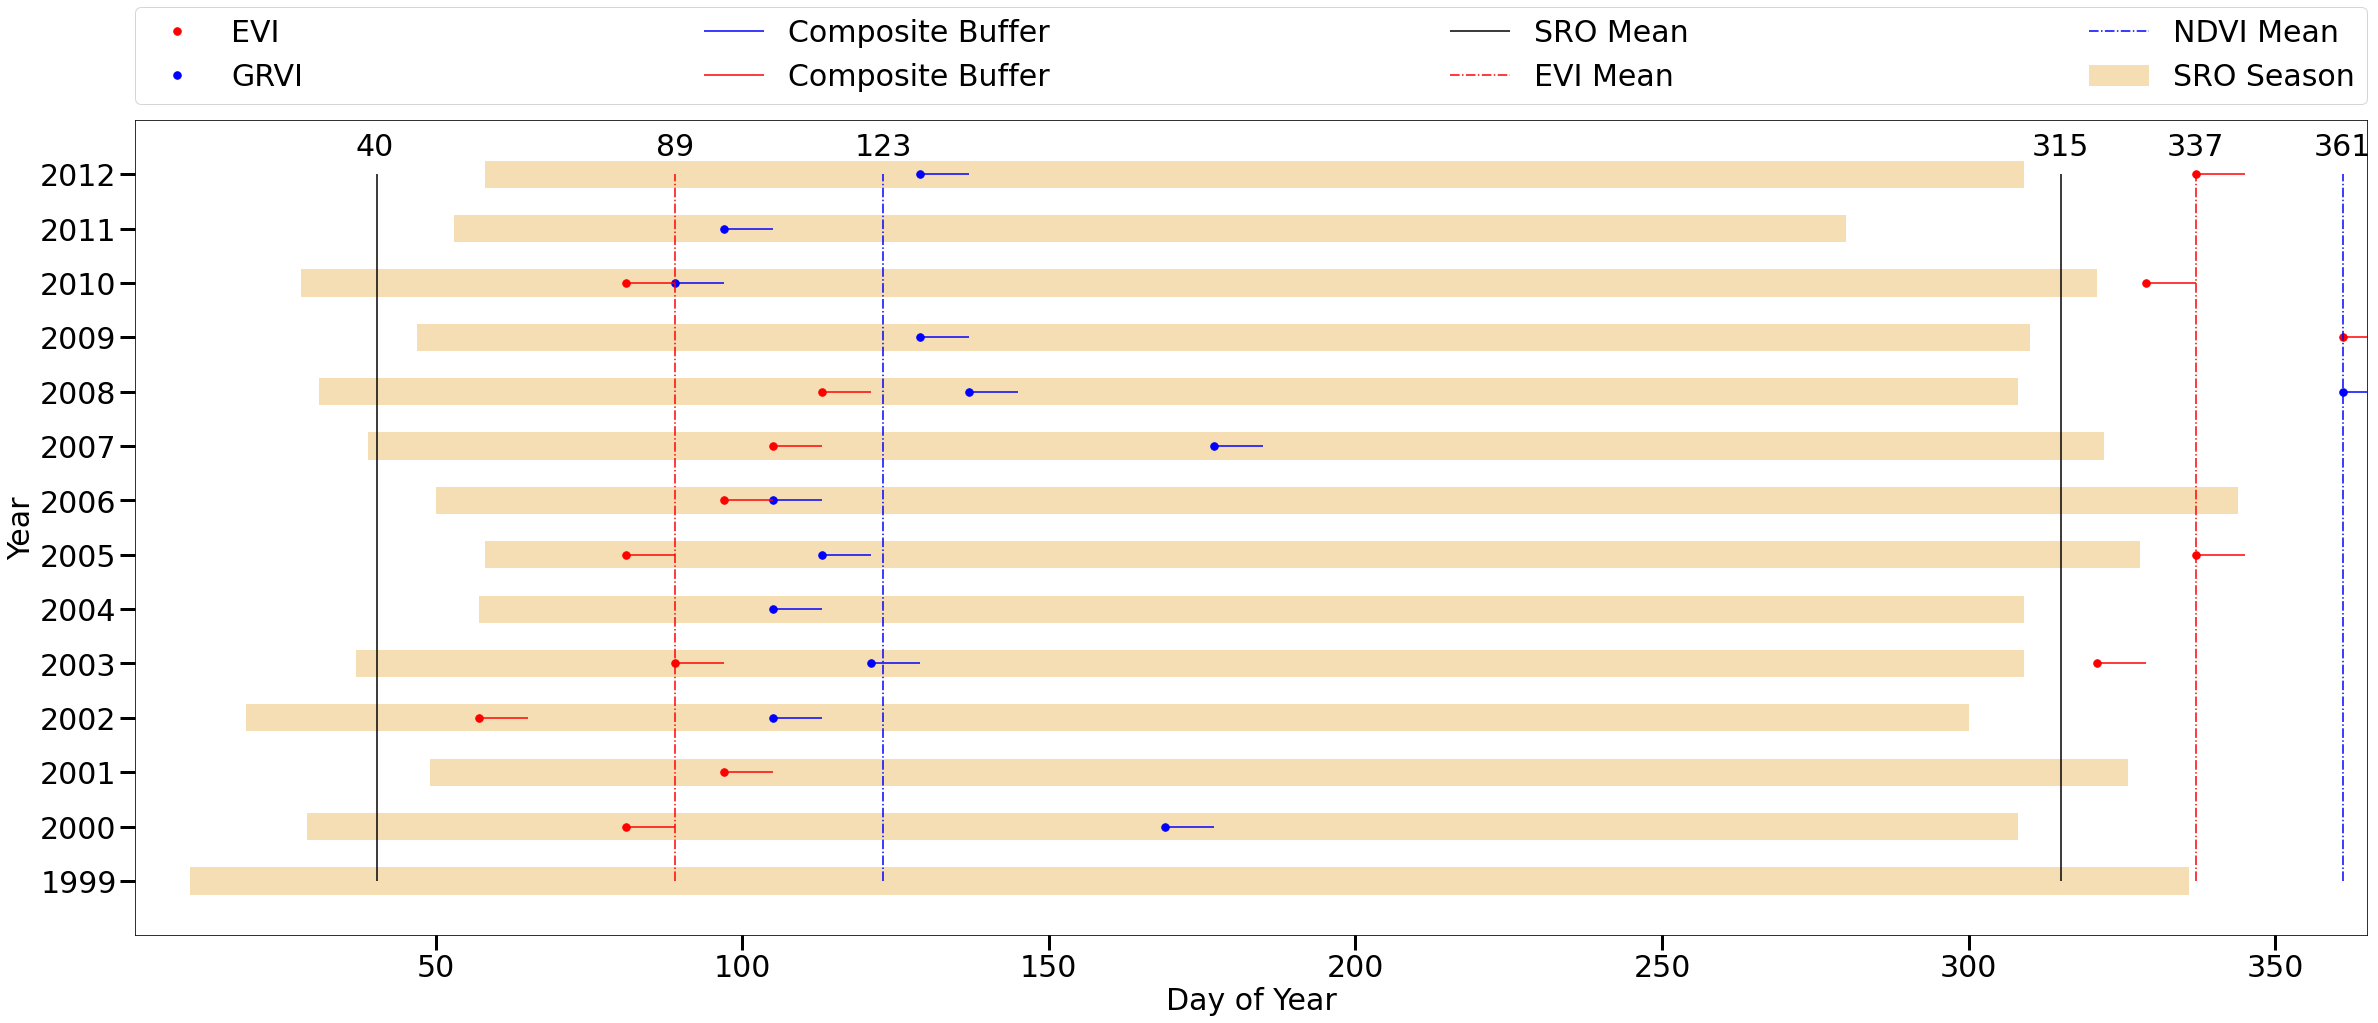

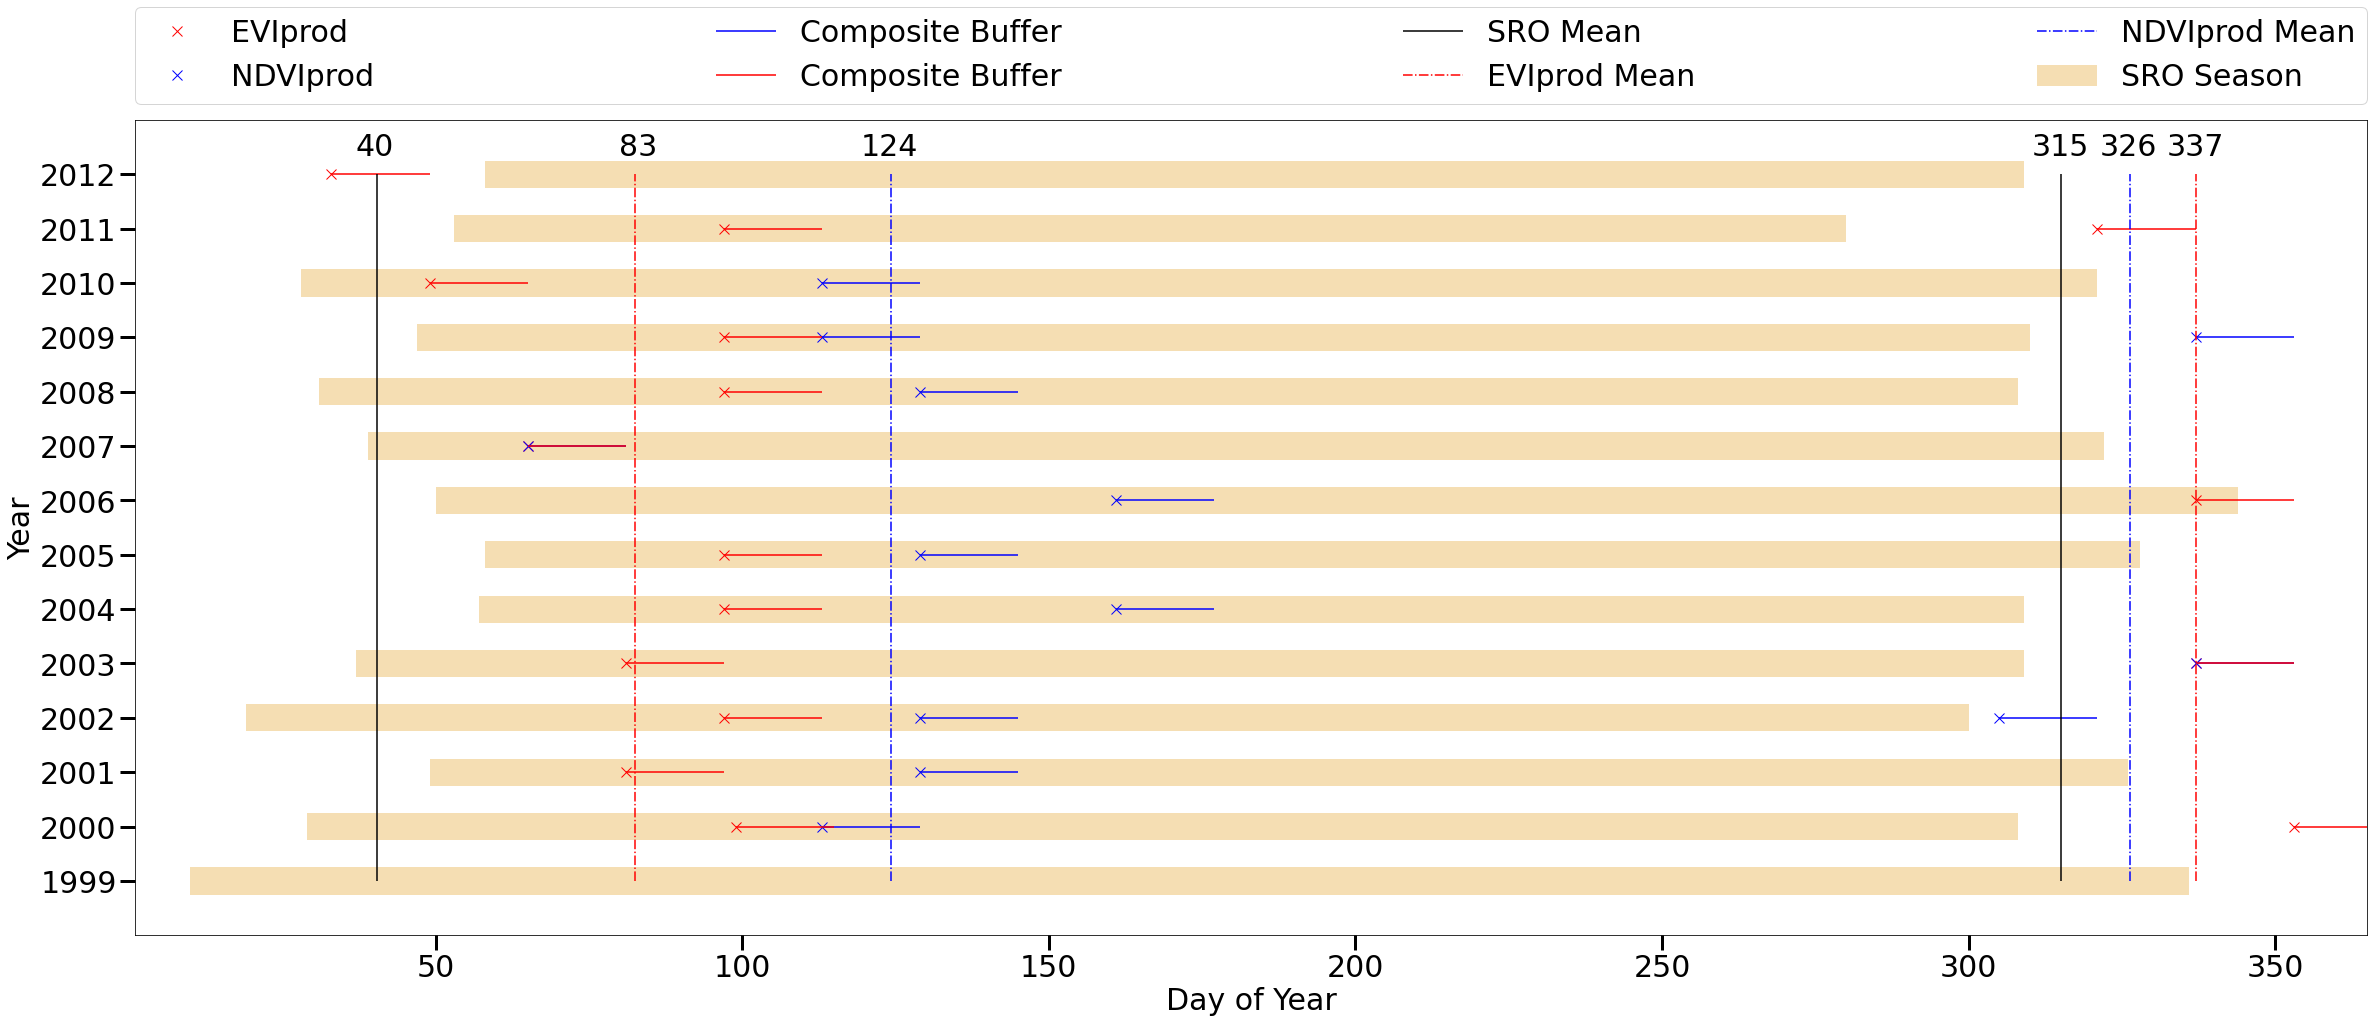

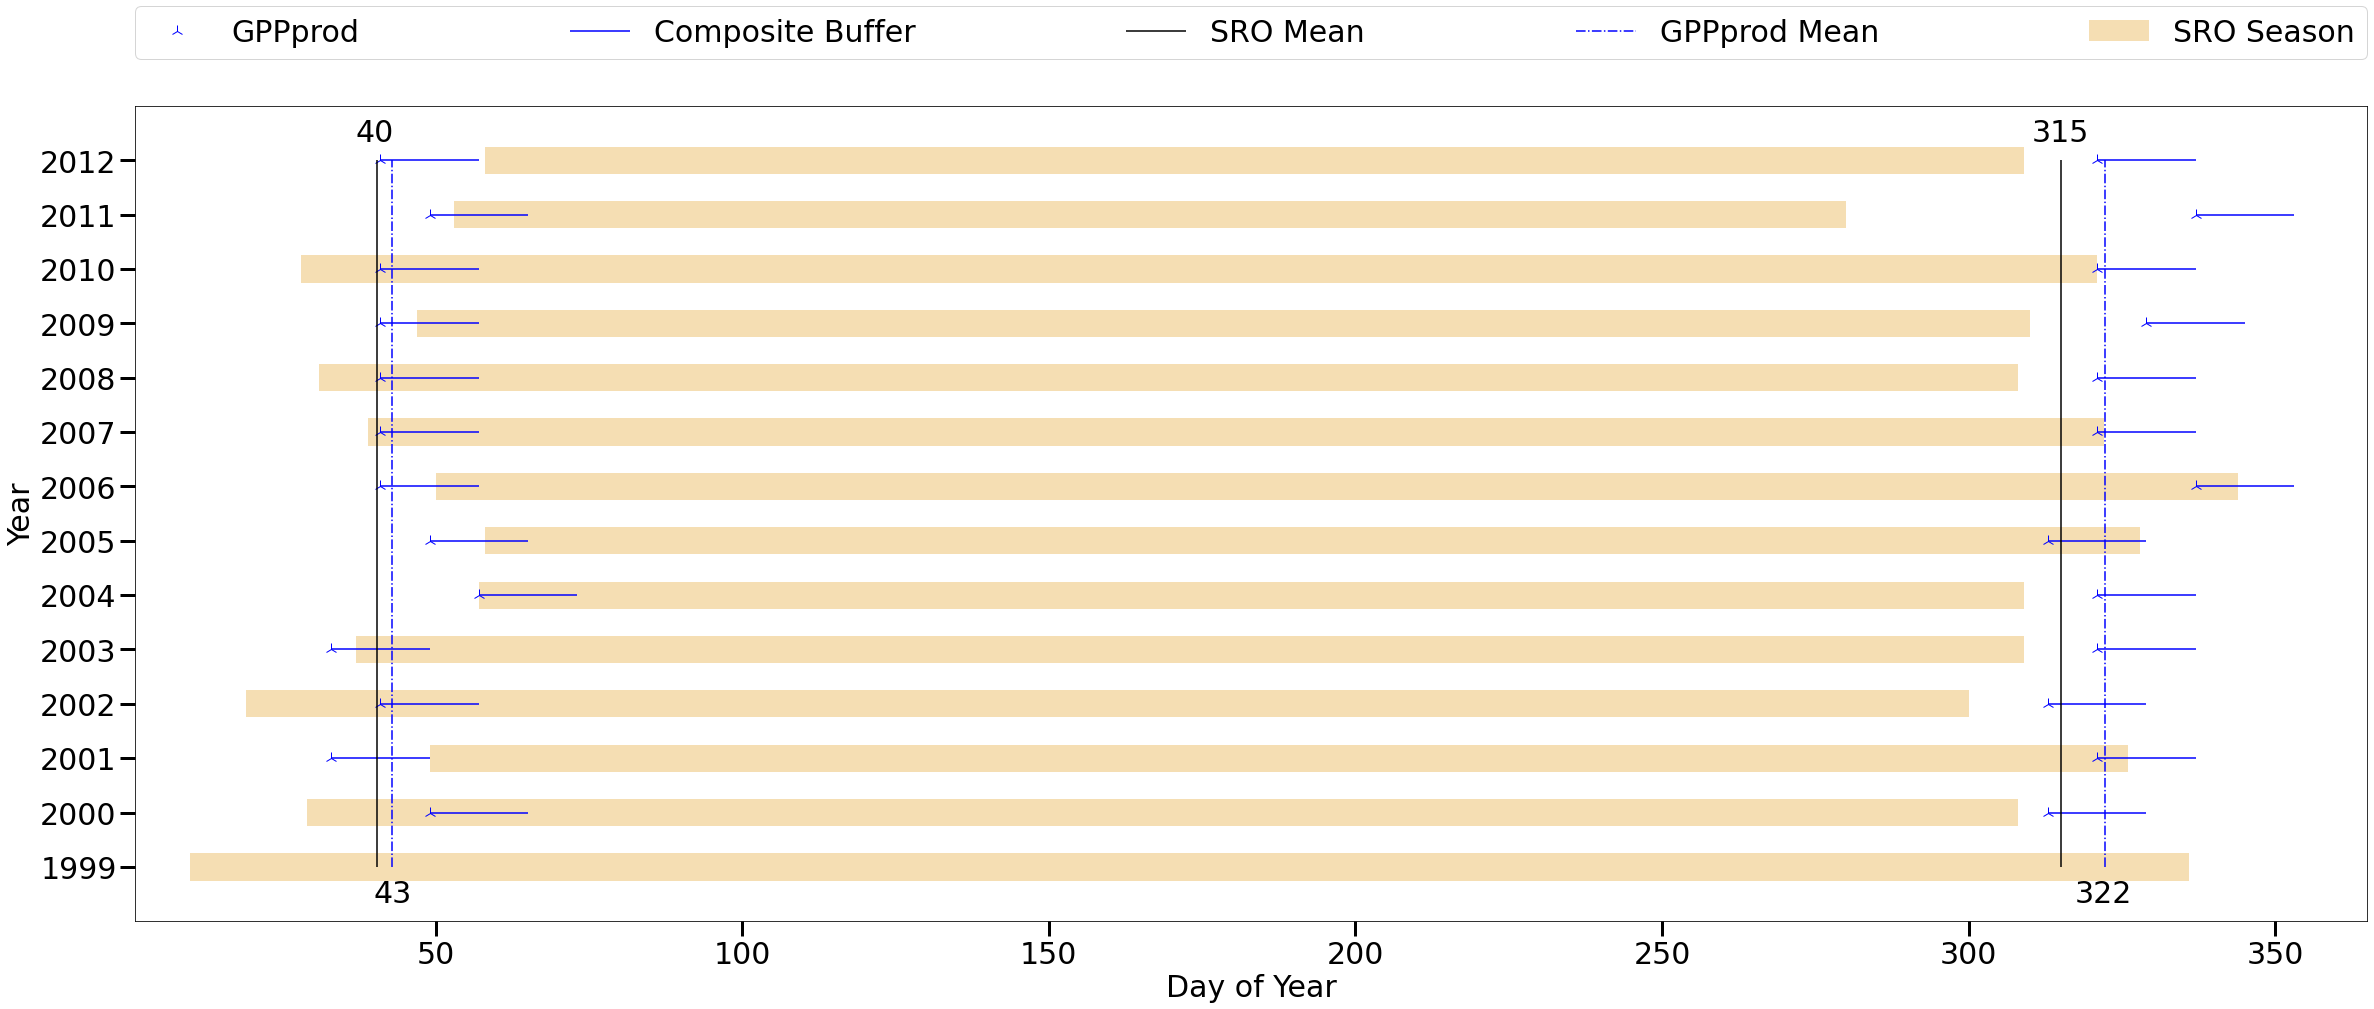

In [11]:

plt.rcParams["figure.figsize"] = (40,15)
plt.rcParams.update({'font.size' : 30})

fig, pheno = plt.subplots()

# plot the validation data as horizontal bars
pheno.barh(df.index, df['SRO_DateDelta'], left = df['SRO_StartDateDelta'], align = 'center',
           color ='wheat', height = 0.5, label = 'SRO Season')

# plot the MOD19AI VIs 
pheno.plot(df['EVI_StartDateDelta'], df.index, marker ='.', color = 'red',
           linewidth = 0, markersize =15, label = 'EVI')
pheno.plot(df['GRVI_StartDateDelta'], df.index,  marker = '.',color = 'blue',
           linewidth = 0, markersize = 15, label = 'GRVI')

pheno.hlines(df.index, df['GRVI_StartDateDelta'], df['GRVI_StartDateDelta_max'], color = 'blue' )
pheno.hlines(df.index, df['EVI_StartDateDelta'], df['EVI_StartDateDelta_max'], color = 'red',)


pheno.plot(df['EVI_EndDateDelta'], df.index,  marker = '.', color = 'red',
           linewidth = 0, markersize =15)
pheno.plot(df['GRVI_EndDateDelta'], df.index,  marker = '.',  color = 'blue',
           linewidth = 0, markersize =15)

pheno.hlines(df.index, df['GRVI_EndDateDelta'], df['GRVI_EndDateDelta_max'], color = 'blue', label = 'Composite Buffer' )
pheno.hlines(df.index, df['EVI_EndDateDelta'], df['EVI_EndDateDelta_max'], color = 'red', label = 'Composite Buffer')

pheno.vlines(df['SRO_StartDateDelta'].mean(), df.index.min(), df.index.max(), color = 'black' ,
                 label = 'SRO Mean')
pheno.vlines(df['EVI_StartDateDelta'].mean(), df.index.min(), df.index.max(), color = 'red', 
                 label = 'EVI Mean', ls= 'dashdot')
pheno.vlines(df['GRVI_StartDateDelta'].mean(), df.index.min(), df.index.max(), color = 'blue',
                 label = 'NDVI Mean', ls= 'dashdot')

pheno.annotate("40", xy=(40, 2012.5), xycoords="data",
                  va="center", ha="center")
pheno.annotate("89", xy=(89, 2012.5), xycoords="data",
                  va="center", ha="center")
pheno.annotate("123", xy=(123, 2012.5), xycoords="data",
                  va="center", ha="center")
pheno.annotate("315", xy=(315, 2012.5), xycoords="data",
                  va="center", ha="center")
pheno.annotate("337", xy=(337, 2012.5), xycoords="data",
                  va="center", ha="center")
pheno.annotate("361", xy=(361, 2012.5), xycoords="data",
                  va="center", ha="center")

pheno.vlines(df['SRO_EndDateDelta'].mean(), df.index.min(), df.index.max(), color = 'black',
                 )
pheno.vlines(df['EVI_EndDateDelta'].mean(), df.index.min(), df.index.max(), color = 'red', 
                  ls = 'dashdot')
pheno.vlines(df['GRVI_EndDateDelta'].mean(), df.index.min(), df.index.max(), color = 'blue', 
                 ls= 'dashdot')

#pheno.annotate(df['SRO_StartDateDelta'].mean(), (x = df['SRO_StartDateDelta'].mean() , y = 2013))
               
pheno.tick_params(length = 15 , width = 3)
pheno.tick_params('y', length = 15 , width = 3)
pheno.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower center',
           ncol=4, mode="expand", borderaxespad=0.)

pheno.set_xlim(1,365)
pheno.set_ylim(1998,2013)
pheno.set_ylabel('Year')
pheno.set_xlabel('Day of Year')
pheno.set_yticks((1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012))
pheno.set_facecolor('white')

plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\indexcompare\pheno.jpeg', format = 'jpeg', dpi = 400)
fig, phenoprod = plt.subplots()

# plot the validation data as horizontal bars
phenoprod.barh(df.index, df['SRO_DateDelta'], left = df['SRO_StartDateDelta'], align = 'center',
           color ='wheat', height = 0.5, label = 'SRO Season')

# plot the MOD13Q1 VI's
phenoprod.plot(df['MOD13_EVI_StartDateDelta'], df.index, marker = 'x', color = 'red',
          linewidth = 0, markersize = 10, label = 'EVIprod')
phenoprod.plot(df['MOD13_NDVI_StartDateDelta'], df.index, marker = 'x', color = 'blue',
          linewidth = 0, markersize = 10, label = 'NDVIprod')


phenoprod.plot(df['MOD13_EVI_EndDateDelta'], df.index, marker='x', color = 'red',
          linewidth = 0, markersize = 10)
phenoprod.plot(df['MOD13_NDVI_EndDateDelta'], df.index, marker='x', color = 'blue',
          linewidth = 0, markersize = 10)



phenoprod.hlines(df.index, df['MOD13_NDVI_StartDateDelta'], df['MOD13_NDVI_StartDateDelta_max'], color = 'blue')
phenoprod.hlines(df.index, df['MOD13_EVI_StartDateDelta'], df['MOD13_EVI_StartDateDelta_max'], color = 'red')

phenoprod.hlines(df.index, df['MOD13_NDVI_EndDateDelta'], df['MOD13_NDVI_EndDateDelta_max'], color = 'blue' , label = 'Composite Buffer')
phenoprod.hlines(df.index, df['MOD13_EVI_EndDateDelta'], df['MOD13_EVI_EndDateDelta_max'], color = 'red', label = 'Composite Buffer')

phenoprod.vlines(df['SRO_StartDateDelta'].mean(), df.index.min(), df.index.max(), color = 'black',
                 label = 'SRO Mean')
phenoprod.vlines(df['SRO_EndDateDelta'].mean(), df.index.min(), df.index.max(), color = 'black')




phenoprod.vlines(df['MOD13_EVI_StartDateDelta'].mean(), df.index.min(), df.index.max(), color = 'red',
                 label = 'EVIprod Mean', ls= 'dashdot')
phenoprod.vlines(df['MOD13_NDVI_StartDateDelta'].mean(), df.index.min(), df.index.max(), color = 'blue',
                 label = 'NDVIprod Mean', ls= 'dashdot')

phenoprod.vlines(df['MOD13_EVI_EndDateDelta'].mean(), df.index.min(), df.index.max(), color = 'red', 
                  ls = 'dashdot')
phenoprod.vlines(df['MOD13_NDVI_EndDateDelta'].mean(), df.index.min(), df.index.max(), color = 'blue', 
                  ls= 'dashdot')
phenoprod.annotate("40", xy=(40, 2012.5), xycoords="data",
                  va="center", ha="center")
phenoprod.annotate("83", xy=(83, 2012.5), xycoords="data",
                  va="center", ha="center")
phenoprod.annotate("124", xy=(124, 2012.5), xycoords="data",
                  va="center", ha="center")
phenoprod.annotate("315", xy=(315, 2012.5), xycoords="data",
                  va="center", ha="center")
phenoprod.annotate("337", xy=(337, 2012.5), xycoords="data",
                  va="center", ha="center")
phenoprod.annotate("326", xy=(326, 2012.5), xycoords="data",
                  va="center", ha="center")

phenoprod.tick_params(length = 15 , width = 3)
phenoprod.tick_params('y', length = 15 , width = 3)
phenoprod.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=4, mode="expand", borderaxespad=0.)
phenoprod.set_xlim(1,365)
phenoprod.set_ylim(1998,2013)
phenoprod.set_ylabel('Year')
phenoprod.set_xlabel('Day of Year')
phenoprod.set_yticks((1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012))
phenoprod.set_facecolor('white')

plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\indexcompare\phenoprod.jpeg', format = 'jpeg', dpi = 400)


fig, phenogpp = plt.subplots()
phenogpp.plot(df['MOD17_GPP_StartDateDelta'], df.index, marker = '2', color = 'blue',
          linewidth = 0, markersize = 12, label = 'GPPprod')

phenogpp.plot(df['MOD17_GPP_EndDateDelta'], df.index, marker='2', color = 'blue',
          linewidth = 0, markersize = 12)

# plot the validation data as horizontal bars
phenogpp.barh(df.index, df['SRO_DateDelta'], left = df['SRO_StartDateDelta'], align = 'center',
           color ='wheat', height = 0.5, label = 'SRO Season')

# plot the MOD17A2H metrics


phenogpp.hlines(df.index, df['MOD17_GPP_StartDateDelta'], df['MOD17_GPP_StartDateDelta_max'], color = 'blue', label = 'Composite Buffer')

phenogpp.hlines(df.index, df['MOD17_GPP_EndDateDelta'], df['MOD17_GPP_EndDateDelta_max'], color = 'blue')



phenogpp.vlines(df['SRO_StartDateDelta'].mean(), df.index.min(), df.index.max(), color = 'black',
                 label = 'SRO Mean')
phenogpp.vlines(df['SRO_EndDateDelta'].mean(), df.index.min(), df.index.max(), color = 'black')


phenogpp.vlines(df['MOD17_GPP_StartDateDelta'].mean(), df.index.min(), df.index.max(), color = 'blue',
                 label = 'GPPprod Mean', ls= 'dashdot')

phenogpp.vlines(df['MOD17_GPP_EndDateDelta'].mean(), df.index.min(), df.index.max(), color = 'blue', 
                  ls = 'dashdot')


phenogpp.annotate("40", xy=(40, 2012.5), xycoords="data",
                  va="center", ha="center")
phenogpp.annotate("43", xy=(43, 1998.5), xycoords="data",
                  va="center", ha="center")
phenogpp.annotate("315", xy=(315, 2012.5), xycoords="data",
                  va="center", ha="center")
phenogpp.annotate("322", xy=(322, 1998.5), xycoords="data",
                  va="center", ha="center")

phenogpp.tick_params(length = 15 , width = 3)
phenogpp.tick_params('y', length = 15 , width = 3)
phenogpp.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='upper left',
           ncol=5, mode="expand", borderaxespad=0.)

phenogpp.set_xlim(1,365)
phenogpp.set_ylim(1998,2013)
phenogpp.set_ylabel('Year')
phenogpp.set_xlabel('Day of Year')
phenogpp.set_yticks((1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012))
phenogpp.set_facecolor('white')
plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\indexcompare\phenogpp.jpeg', format = 'jpeg', dpi = 400)
plt.show()


